## This Notebook generates an image file for Figure 2
The figure is a frequency plot showing the number of fish assessed in the wild sampling events where fish were caught.

In [28]:
from pathlib import Path
import pandas as pd
import seaborn as sns

In [29]:
# define data location constants
DATA_DIR = Path('..') / 'source_data'
WILD_FISH_DATA = DATA_DIR / 'all_wild_fish_lice.csv'
WILD_EVENT_DATA = DATA_DIR / 'all_wild_sample_events.csv'

OUTPUT_DIR = Path('..') / 'output' / 'Figure_2'

## Format the data

In [30]:
# import and merge the data
events_df = pd.read_csv(WILD_EVENT_DATA, parse_dates=['sampledate'])
fish_df = pd.read_csv(WILD_FISH_DATA)

# merge on the right so we only get events where there were fish caught
wild_df = pd.merge(events_df, fish_df, on='event_id', how='left')

In [31]:
# group by event and count the number of fish
wild_event_group = wild_df.groupby(['event_id'])
wild_num_fish_per_event_df = wild_event_group['fish_id'].agg('count').reset_index()

In [32]:
# rename fish_id column to 'fish_count' so it's clearer what it's for
wild_num_fish_per_event_df.rename(columns={'fish_id': 'fish_count'}, inplace=True)

wild_num_fish_per_event_df.head()

,event_id,fish_count
0,1.0,8
1,2.0,10
2,3.0,15
3,4.0,3
4,5.0,26


## Create the frequency plot

In [33]:
# configure seaborn
sns.set_style('whitegrid')
sns.set(rc={"figure.figsize": (30, 15)})
sns.set_context("paper")
sns.set_palette('colorblind')

sns.set(font_scale=2.4) 

[Text(0.5, 0, 'Number of fish in sample'),
 Text(0, 0.5, 'Number of sampling events'),
 (1.0, 115.0),
 (0.0, 1200.0),

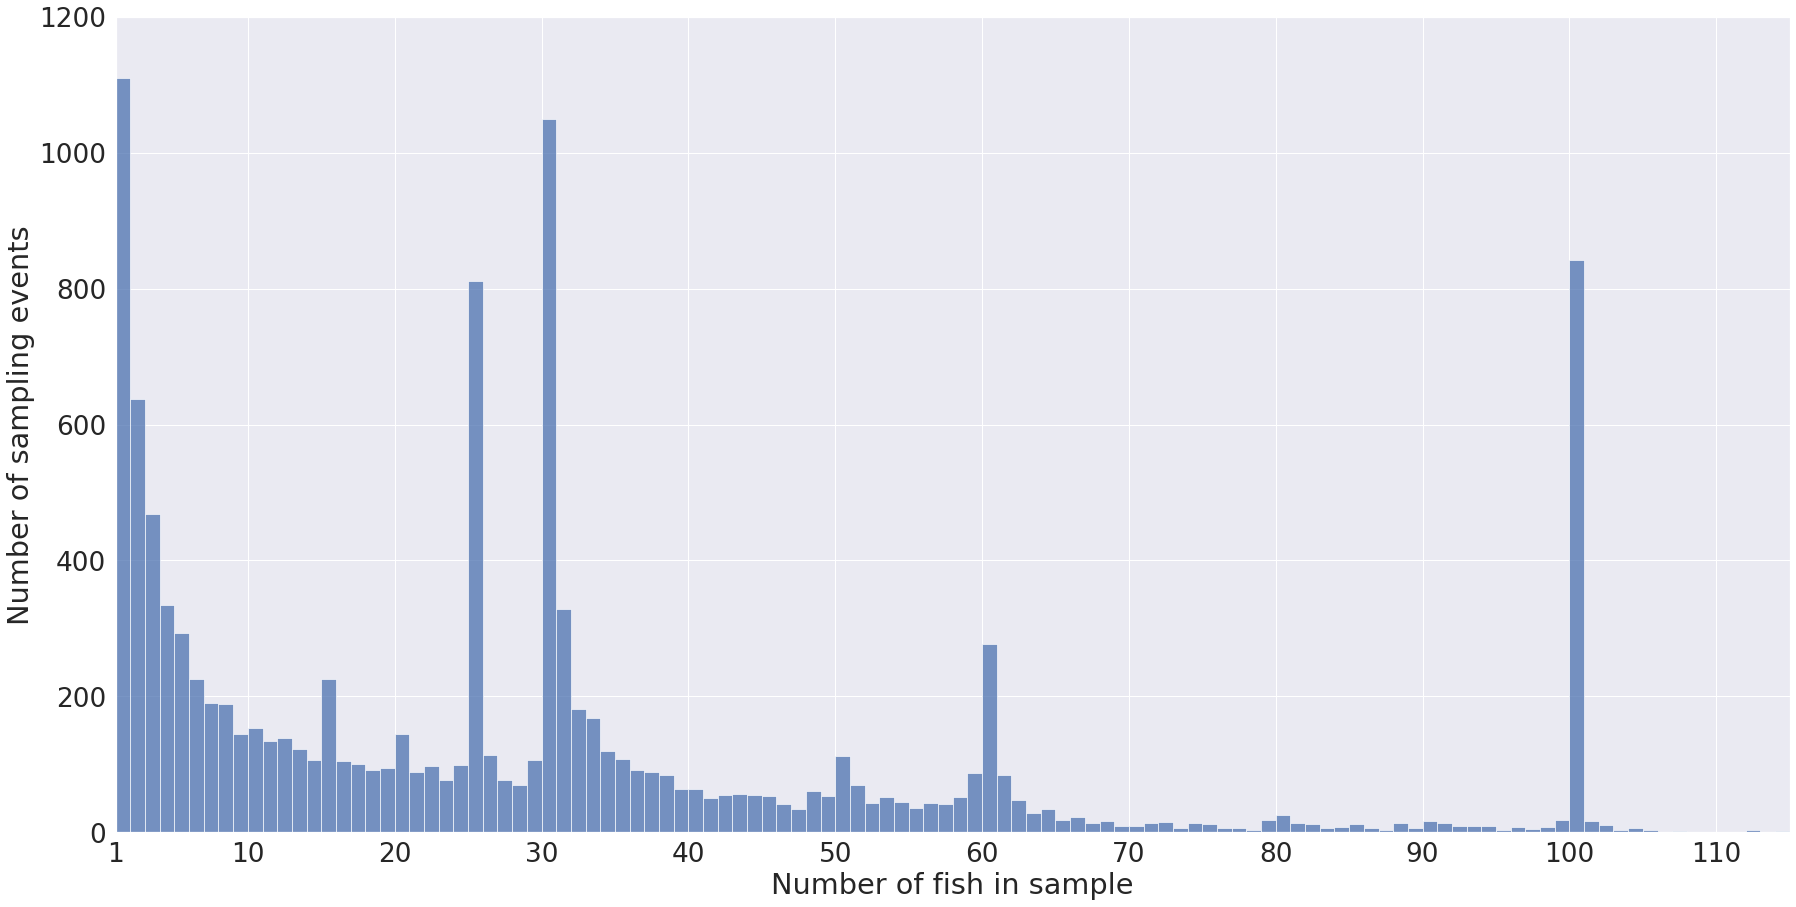

In [34]:
chart = sns.histplot(data=wild_num_fish_per_event_df, x='fish_count', binwidth=1)
chart.set(xlabel="Number of fish in sample", ylabel="Number of sampling events",  xlim=(1, 115), ylim=(0, 1200),
          xticks=[1] + list(range(10, 115, 10)))


In [35]:
chart.get_figure().savefig(OUTPUT_DIR / 'Fig2_wild_sample_freq.png', bbox_inches='tight')

In [36]:
# more than 115 fish in the events - not shown in the chart
wild_num_fish_per_event_df[wild_num_fish_per_event_df.fish_count > 115].sort_values('fish_count')

,event_id,fish_count
6634,6635.0,116
6124,6125.0,120
3605,3606.0,123
6623,6624.0,124
15378,65467.0,126
4600,4601.0,126
6638,6639.0,129
6639,6640.0,129
6626,6627.0,130
6628,6629.0,130
